In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
import math
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
fname = 'default of credit card clients.xls'
fpath = '/home/vega/Downloads'


In [290]:
data = pd.read_excel(os.path.join(fpath, fname), sheet_name='Data', index_col=0, header=1)

In [291]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

X4: Marital status (1 = married; 2 = single; 3 = others). 

X5: Age (year). 

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

In [275]:
data.shape

(30000, 25)

    Clean up the data, take the firs trow as header

In [292]:
#data = data.rename(columns = data.iloc[0]).drop(data.index[0])
# error in data source
data = data.rename(columns={"PAY_0":"PAY_1"})

In [294]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [271]:
data.columns

MultiIndex(levels=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]],
           labels=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

In [241]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


    Distribution

default = 77.88000000000001%


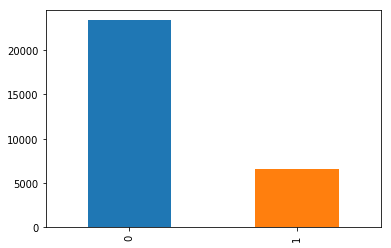

In [188]:
defaults = data['default payment next month'].value_counts()
print(f'default = {defaults[0]/defaults.sum() *100}%')
defaults.plot(kind='bar')

In [183]:
defaults

0    23364
1     6636
Name: default payment next month, dtype: int64

    Gender

female =18112, 60.373333333333335%
male =11888, 39.626666666666665%


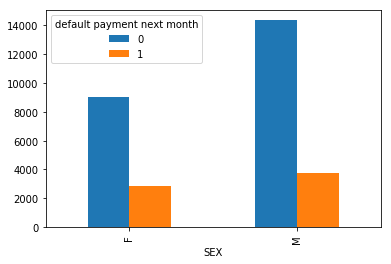

In [146]:
df = data.copy()
total = df.shape[0]
female = df[df['SEX'] == 2].shape[0]
male = df[df['SEX'] == 1].shape[0]
print(f"female ={female}, {female/total*100}%")
print(f"male ={male}, {male/total*100}%")

gender = df[['SEX', 'default payment next month']].groupby(['SEX', 'default payment next month']).size().unstack(level=1).rename(index={1:'F', 2:'M'})
gender.plot(kind='bar')

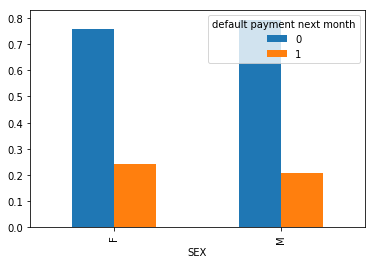

In [150]:
gender_p = gender.div(gender.sum(axis=1), axis=0)
gender_p.plot(kind='bar')

    Education
    (1 = graduate school; 2 = university; 3 = high school; 4 = others).



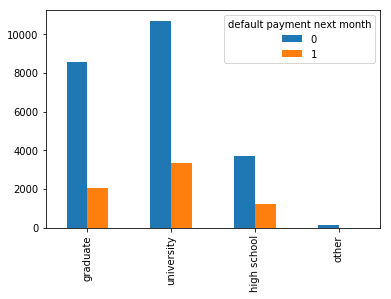

In [54]:
edu = df[['EDUCATION', 'default payment next month']].groupby(['EDUCATION', 'default payment next month']).size().unstack(level=1).reset_index()
edu = edu[edu['EDUCATION'].isin([1,2,3,4])].rename(index={1:'graduate', 2:'university', 3:'high school', 4:'other'}).drop(['EDUCATION'], axis=1)
edu.plot(kind='bar')


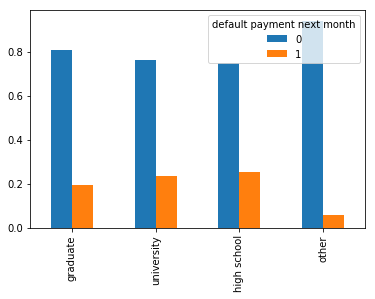

In [71]:
edu_p = edu.div(edu.sum(axis=1), axis=0)
edu_p.plot(kind='bar')

    Marriage 
    1 = married; 2 = single; 3 = others

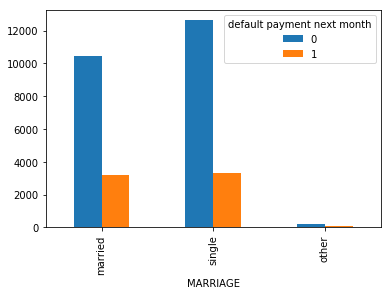

In [56]:
marriage = df[['MARRIAGE','default payment next month']].groupby(['MARRIAGE', 'default payment next month']).size().unstack(level=1)
marriage = marriage[marriage.index.isin([1,2,3])].rename(index={1:'married', 2:'single', 3:'other'})
marriage.plot(kind='bar')


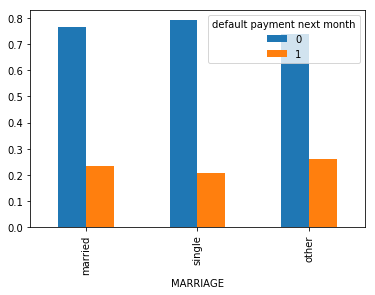

In [70]:
marriage_p = marriage.div(marriage.sum(axis=1), axis=0)
marriage_p.plot(kind='bar')


      Age (year)

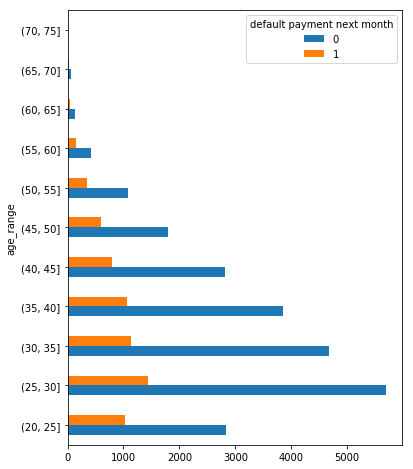

In [145]:
age = df.copy()
age['age_range'] = pd.cut(df['AGE'], range(20, 80, 5))
age = age[['age_range','default payment next month']].groupby(['age_range', 'default payment next month']).size().unstack(level=1)
age.plot(kind='barh', figsize=(6,8))

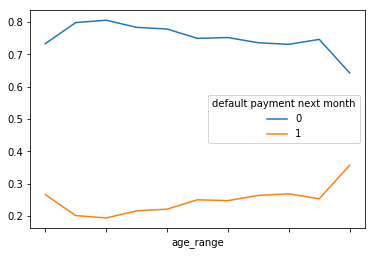

In [144]:
age_p = age.div(age.sum(axis=1), axis=0)
#age_p.plot(kind='bar')
age_p.plot()

...and most importantly, the credit given

min=10000  max=1000000


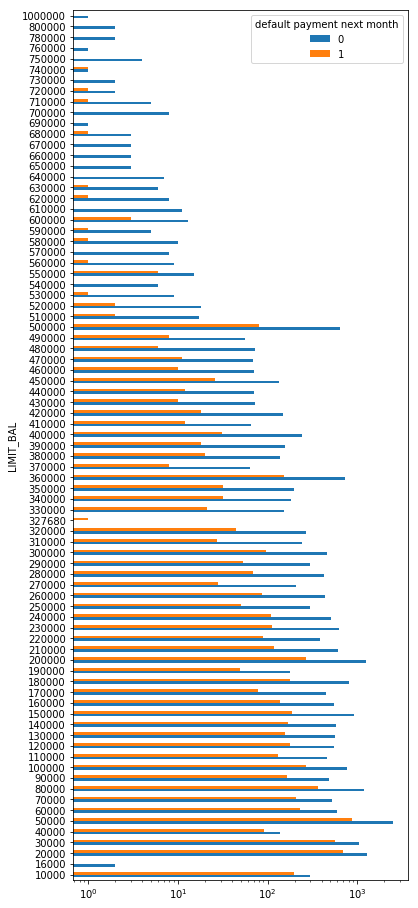

In [226]:
limit_bal = data.copy()top_indices = np.nan_to_num(selector.scores_).argsort()[-25:][::-1]
selector.scores_[top_indices]
data.columns[top_indices]
print(f"min={limit_bal['LIMIT_BAL'].min()}  max={limit_bal['LIMIT_BAL'].max()}")
#limit_bal['bal_range'] = pd.cut(limit_bal['LIMIT_BAL'], range(10000, 1000000, 5000))
limit_bal = limit_bal[['LIMIT_BAL','default payment next month']].groupby(['LIMIT_BAL', 'default payment next month']).size().unstack(level=1)
#lb_plot = limit_bal.plot(kind='barh', figsize=(6,18))
limit_bal.fillna(0, inplace=True)
limit_bal_plot = limit_bal.plot(kind='barh', figsize=(6,16))
limit_bal_plot.set_xscale('log')

In [344]:
normalized_data = data.copy()

In [345]:
#normalized_data['LIMIT_BAL'] = np.log(normalized_data['LIMIT_BAL'])

Let's try logistic regression:

In [346]:
train_cols = normalized_data.columns.tolist()
train_cols.remove('default payment next month')
train_data = normalized_data[train_cols]
target_data = normalized_data['default payment next month']

In [338]:
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.25, random_state=0)

In [349]:
lgr = LogisticRegression()
lgr.fit(x_train, y_train)
score = logistic_regr.score(x_test, y_test)
score

0.7825333333333333

KNN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(1, 10)
scores = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    score = metrics.accuracy_score(y_test, y_pred)
    scores[k] = score
    print(f"k={k} score={score}")

SVM

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
score = metrics.accuracy_score(y_test, y_pred)
score